In [49]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
import keras
from tensorflow.keras import layersl
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import RMSprop
# from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

In [50]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

In [51]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(256, 256), 
        batch_size = 600, 
        seed = 123,
        class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [52]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(256, 256), 
        batch_size = 624, 
        seed = 123,
        class_mode="binary")
#         shuffle = False) 

Found 624 images belonging to 2 classes.


In [53]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(256, 256), 
        batch_size = 16, 
        seed = 12,
        class_mode="binary")
#         shuffle = False) 

Found 16 images belonging to 2 classes.


In [54]:
train_images, train_labels = next(data_train)
test_images, test_labels = next(data_test)
val_images, val_labels = next(data_val)

In [55]:
X_train = np.array(train_images)
y_train = np.array(train_labels)

X_test = np.array(test_images)
y_test = np.array(test_labels)

X_val = np.array(val_images)
y_val = np.array(val_labels)

In [35]:
# def fix_data(x, y):
#     x = x.astype('float32')
#     ds = tf.data.Dataset.from_tensor_slices((x,y))
#     ds = ds.shuffle(1000, reshuffle_each_iteration = True)
#     ds = ds.repeat()
#     ds = ds.batch(50, drop_remainder = True)
#     return ds

# fix_train = fix_data(train_images, train_labels)
# # fix
# print(fix_train)
# fix_val = fix_data(val_images, val_labels)
# print(fix_val)
# fix_test = fix_data(test_images, test_labels)

<BatchDataset shapes: ((50, 256, 256, 3), (50,)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((50, 256, 256, 3), (50,)), types: (tf.float32, tf.float32)>


In [81]:
cnn = Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #padding added so edge pixels get included in convolution
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')) #hidden layer
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #max pooling
cnn.add(layers.Flatten()) #flatten layer
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.007),
              metrics=['acc', 'Recall', 'Precision', 'AUC']) #compiling with gradient descent


history = cnn.fit(X_train,
                y_train,
                epochs=2,
                batch_size=50,
                validation_data=(X_val, y_val))

Epoch 1/2
12/12 [==============================] - 41s 3s/step - loss: 4.8972 - acc: 0.5127 - recall: 0.4989 - precision: 0.7027 - auc: 0.5448 - val_loss: 0.6522 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.9297
Epoch 2/2
12/12 [==============================] - 43s 4s/step - loss: 0.7649 - acc: 0.7747 - recall: 0.8921 - precision: 0.8270 - auc: 0.8201 - val_loss: 0.7785 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.9219


In [82]:
cnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                4194336   
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

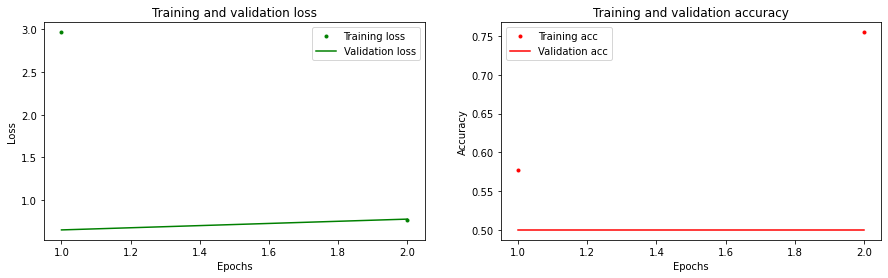

In [83]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
results_train = cnn.evaluate(data_train)
results_test = cnn.evaluate(data_test)
print(results_train, results_test)

1/1 [==============================] - 17s 17s/step - loss: 0.6941 - acc: 0.6346 - recall: 0.9923 - precision: 0.6324 - auc: 0.7827
[0.4062647819519043, 0.761886477470398, 0.9927741885185242, 0.7601264715194702, 0.8848253488540649] [0.6940584182739258, 0.6346153616905212, 0.9923076629638672, 0.6323529481887817, 0.7827197313308716]


In [71]:
#confusion matrix
pred = cnn.predict(X_test)
cm = confusion_matrix(y_test, pred.round())
cm

array([[  0, 234],
       [  0, 390]], dtype=int64)

<AxesSubplot:>

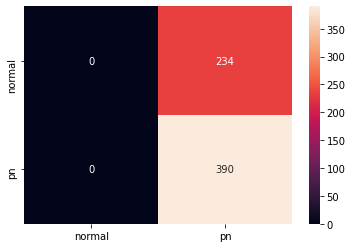

In [88]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', xticklabels = ['normal', 'pn'], yticklabels = ['normal', 'pn'])